In [1]:
import numpy as np
import pandas as pd
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from src.eda_analysis import EdaAnalysis

EDA Class Initialized Successfully

--- Dataset Overview ---



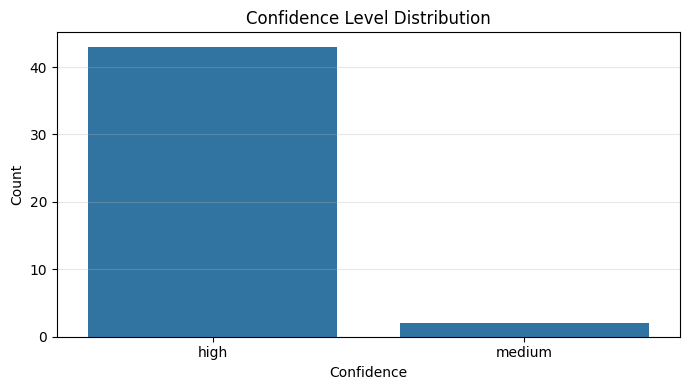

record_type
observation    34
event          11
target          1
Name: count, dtype: int64


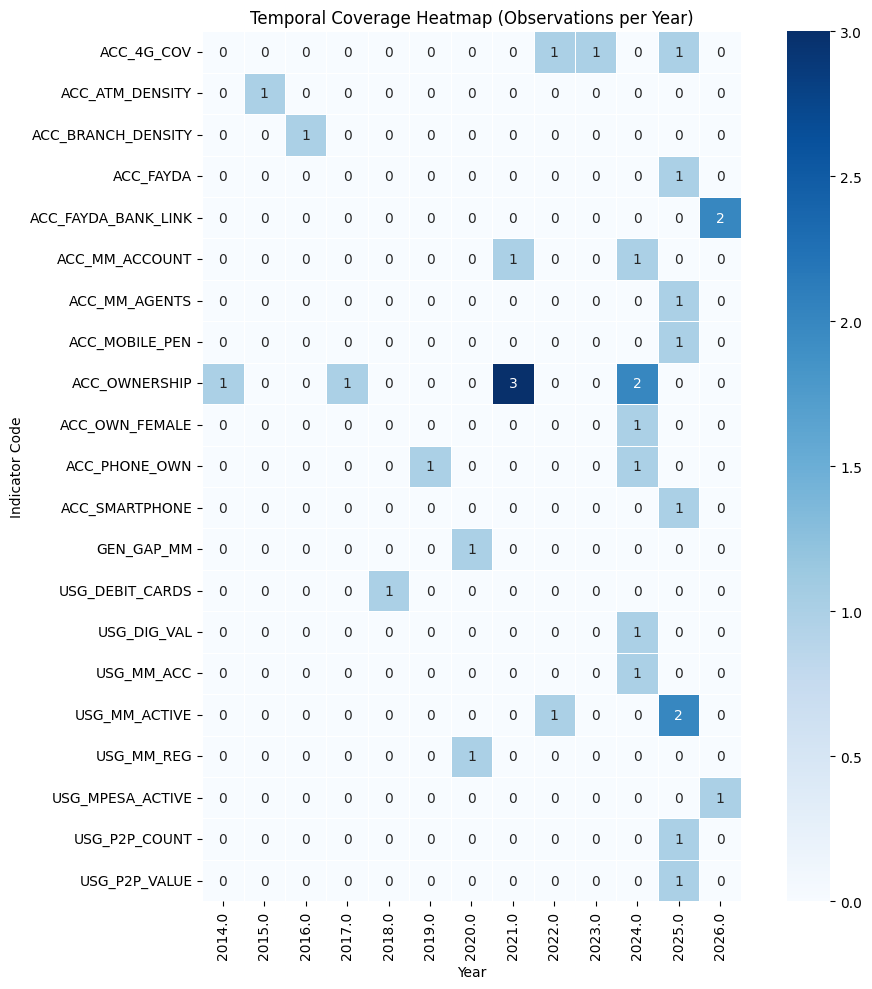

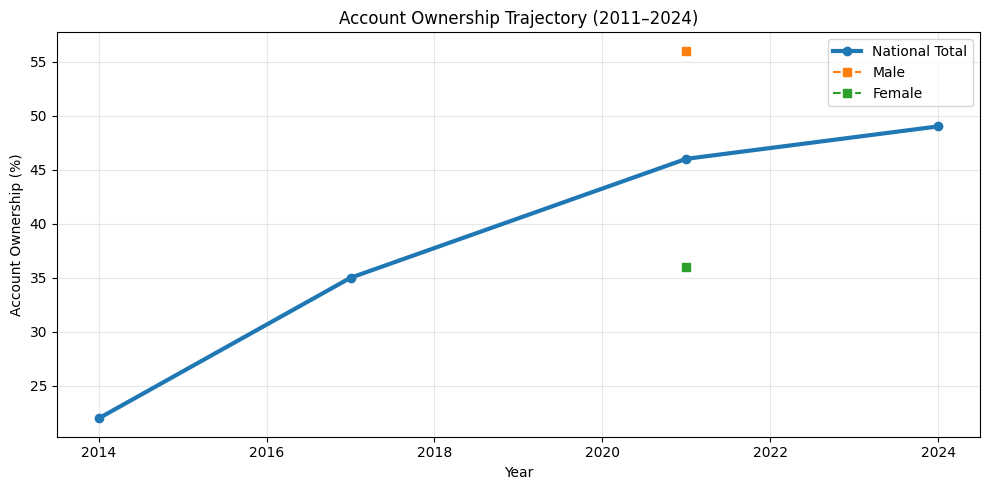

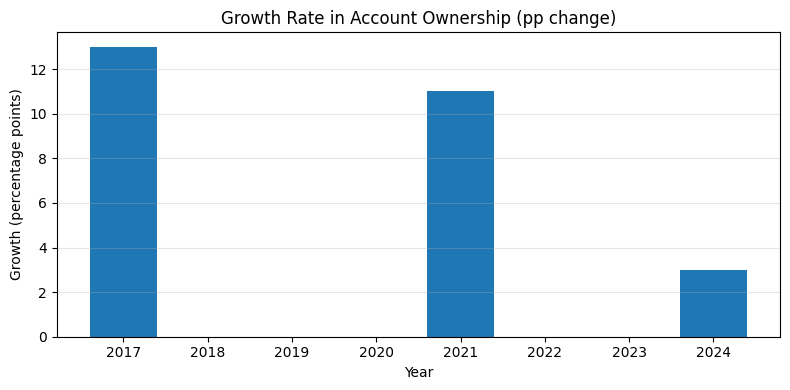


Growth Table:

     year  value_numeric  growth_pp
0  2014.0           22.0        NaN
1  2017.0           35.0       13.0
2  2021.0           46.0       11.0
5  2024.0           49.0        3.0


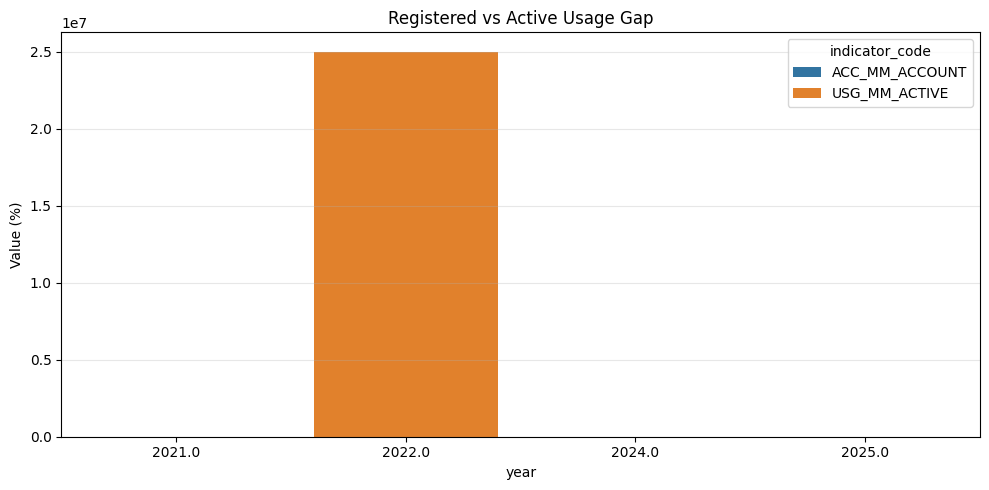

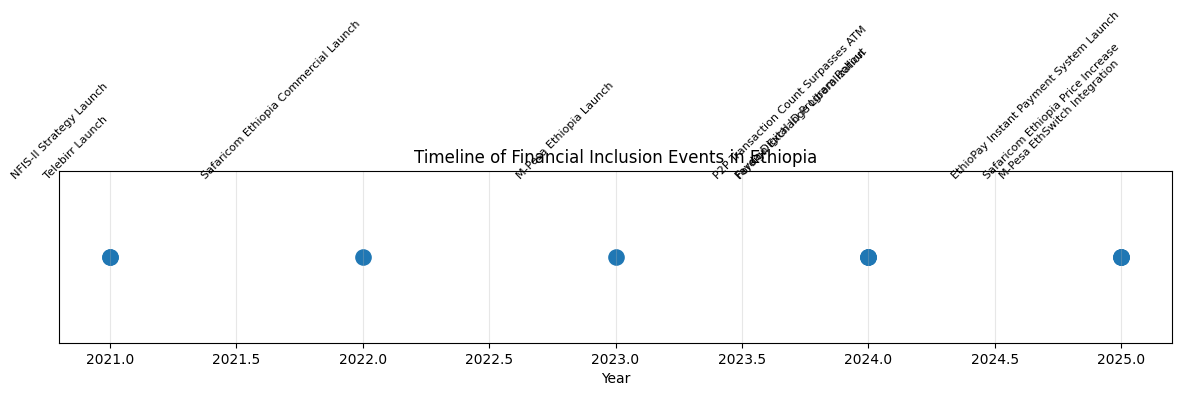

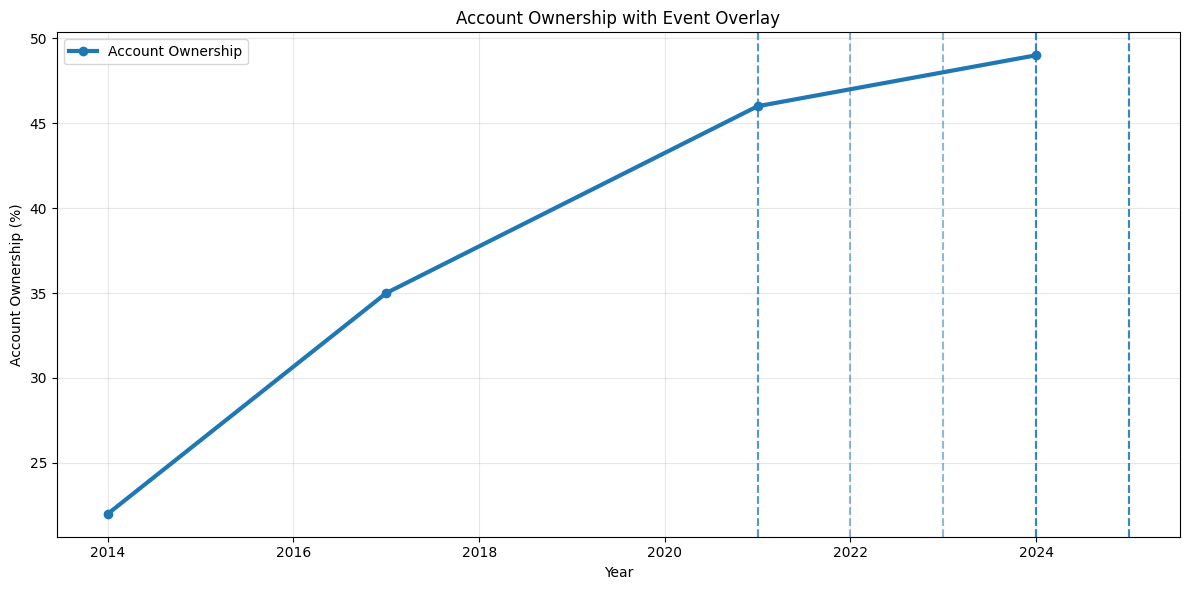

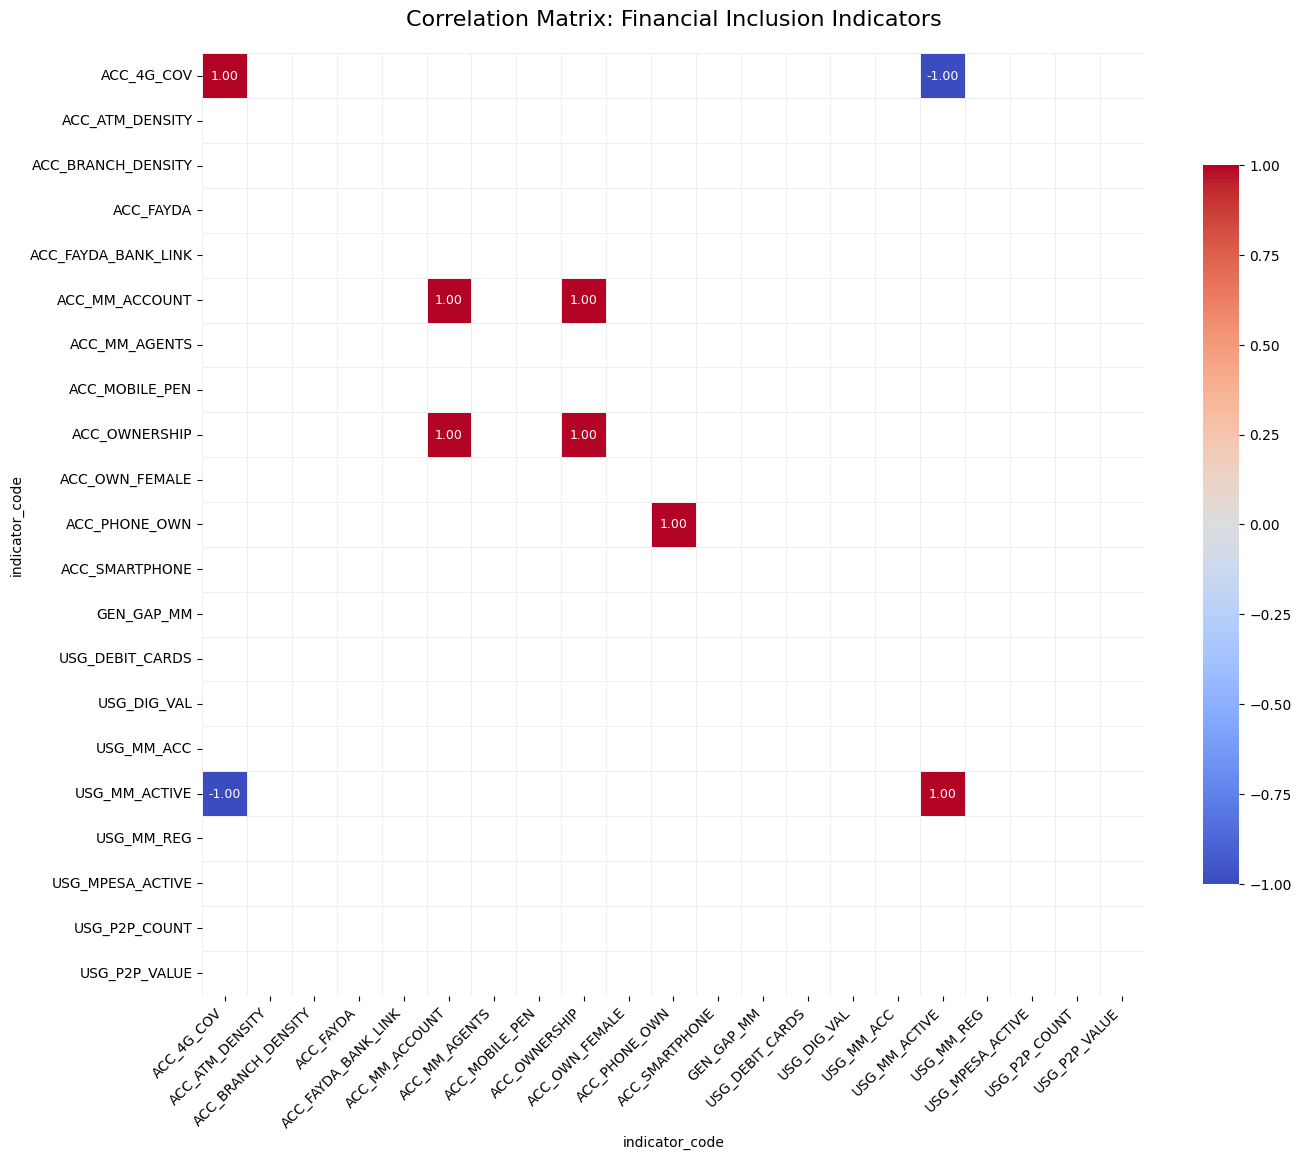

No impact links found.


In [2]:
# Initialize with Excel file
# Initialize with Excel file
eda = EdaAnalysis("../data/processed/ethiopia_fi_unified_data.xlsx", sheet_name="ethiopia_fi_unified_data")

# Overview
record_summary, pillar_summary, source_summary = eda.get_dataset_overview()
print(record_summary)

# Temporal coverage
eda.plot_temporal_coverage()

# Account ownership
eda.plot_access_and_gender()

# Growth rates
eda.plot_growth_rates()

# Mobile money / usage gap
eda.plot_usage_vs_registration()

# Infrastructure example (use existing plotting functions if needed)

# Event timeline
eda.plot_event_timeline()
eda.plot_event_impact_overlay()

# Correlation matrix
eda.get_key_correlations()

# Impact link summary
eda.summarize_impact_links()
